# Core statistical concepts
Core Statistical Concepts in Data Analysis
1. Mean
The mean (or average) is the sum of all data points divided by the number of points. It provides a central value for the dataset and is widely used for comparison and summarization. 
- mean = (x1 + x2 + ... + xn) / n
- mean in python/pandas: df['col'].mean()
​
2. Median
The median is the middle value in an ordered dataset. It is less affected by outliers than the mean, making it useful for skewed distributions.

Definition and formula:
- If n is odd: $m = x_{(n+1)/2}$
- If n is even: $m = \frac{x_{n/2} + x_{n/2 + 1}}{2}$

Example:
- For the ordered list [2, 3, 5], n=3 (odd) → median = 3
- For the ordered list [2, 3, 5, 8], n=4 (even) → median = (3 + 5) / 2 = 4

- median in python/pandas: df['col'].median()

3. Standard Deviation
Standard deviation measures the dispersion or spread of data points around the mean. A low standard deviation indicates that data points are close to the mean, while a high standard deviation indicates greater variability.

Formula:
(\sigma = \sqrt{\frac{1}{n} \sum{i=1}^{n} (xi - \mu)^2})

4. Hypothesis Testing
Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It involves formulating a null hypothesis ((H0)), collecting data, and using statistical tests (e.g., t-test, chi-square test) to determine whether to reject (H0).

5. Basic Probability
Probability quantifies the likelihood of an event occurring. It ranges from 0 (impossible) to 1 (certain). Probability theory underpins all statistical inference and helps in making predictions under uncertainty.

Why These Concepts Matter
These principles are foundational to data analysis because they:

Provide ways to summarize and understand data (mean, median, standard deviation)
Allow for rigorous comparison and prediction (probability)
Enable evidence-based conclusions and decision-making (hypothesis testing)
Mastering these concepts is essential for extracting meaningful insights from data and conducting robust analyses.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\CancelScope-Hotel-Booking-Analysis'

# Data overview and statistics


Import neccessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the cleaned file

In [5]:
df = pd.read_csv(os.path.join(current_dir, "data", "clean", "hotel_bookings_clean.csv"))

---

# Core statistical concepts
Core Statistical Concepts in Data Analysis
1. Mean
The mean (or average) is the sum of all data points divided by the number of points. It provides a central value for the dataset and is widely used for comparison and summarization. 
- mean = (x1 + x2 + ... + xn) / n
- mean in python/pandas is calculated using mean() function
​
2. Median
The median is the middle value in an ordered dataset. If the number of observations is even, it is the average of the two middle values. The median is less affected by outliers than the mean, making it useful for skewed distributions.
- If the number of observations is odd, the median is the middle value.
- If the number of observations is even, the median is the average of the two middle values.
- The median is less affected by outliers than the mean, making it useful for skewed distributions.
- In Pandas it is calculated using .median() function

3. Standard Deviation
Standard deviation measures the dispersion or spread of data points around the mean. A low standard deviation indicates that data points are close to the mean, while a high standard deviation indicates greater variability.
- A low standard deviation means the data points are close to the mean.
- A high standard deviation means the data points are more spread out.
- In pandas the standard deviation is calculated using the .std() function. By default, it computes the sample standard deviation (uses n - 1 in the denominator).

4. Hypothesis Testing
Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data.
Steps Involved:
- Formulate the hypotheses:
- Null hypothesis (H₀): The default assumption (e.g., no effect, no difference).
- Alternative hypothesis (H₁ or Ha): What you want to test for.
- Collect sample data.
- Perform a statistical test (e.g., t-test, chi-square test, ANOVA).
- Decide whether to reject H₀ based on the test statistic and p-value.
Key Point:
- Rejecting H₀ suggests evidence for the alternative hypothesis, while failing to reject H₀ indicates insufficient evidence.

5. Basic Probability
Probability quantifies the likelihood of an event occurring.
- Ranges from 0 (impossible) to 1 (certain).
- Probability theory is the foundation of statistical inference and helps in making predictions under uncertainty.
- Formula (for a simple event) is: number of favorable outcomes / total number of possible outcomes

Why These Concepts Matter
These principles are foundational to data analysis because they:
- Summarize and describe data: Mean, median, and standard deviation help understand the distribution and spread.
- Support comparison and prediction: Probability allows for quantifying uncertainty and making predictions.
- Enable evidence-based decisions: Hypothesis testing helps draw conclusions backed by data.

Bottom line:
Mastering these concepts is essential for extracting meaningful insights and performing robust data analyses.

Exploratory data analysis

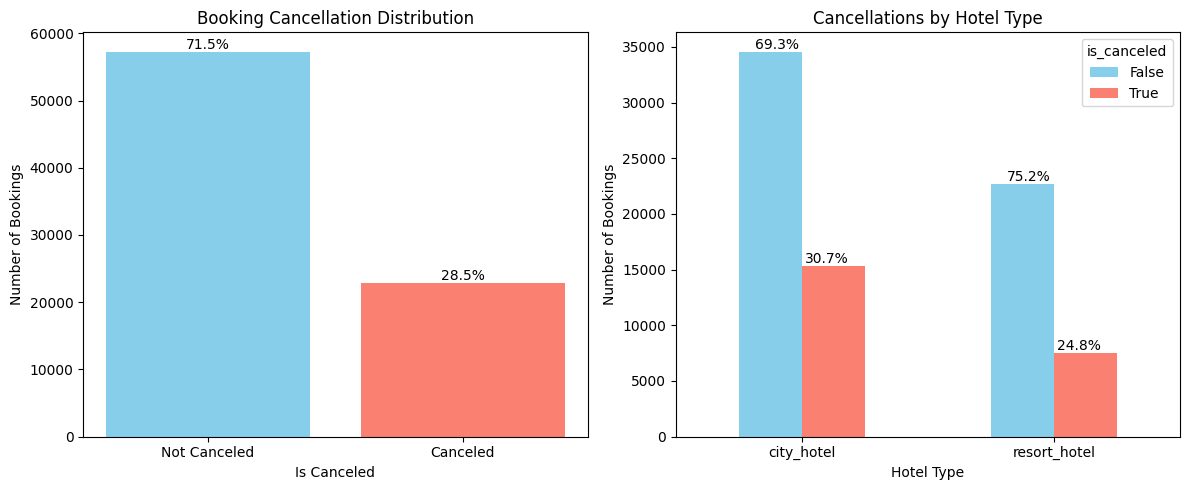

In [8]:
# Plot cancellation distribution and cancellations per hotel on one figure with percentage labels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Overall cancellation distribution
cancel_counts = df['is_canceled'].value_counts()
bars = axes[0].bar([0, 1], cancel_counts, color=['skyblue', 'salmon'])
axes[0].set_xlabel('Is Canceled')
axes[0].set_ylabel('Number of Bookings')
axes[0].set_title('Booking Cancellation Distribution')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Canceled', 'Canceled'], rotation=0)

# Add percentage labels on top of bars
total = cancel_counts.sum()
for bar, count in zip(bars, cancel_counts):
    percent = f"{count/total:.1%}"
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), percent, ha='center', va='bottom', fontsize=10)

# Right plot: Cancellations per hotel type
hotel_cancel = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
bars2 = hotel_cancel.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_xlabel('Hotel Type')
axes[1].set_ylabel('Number of Bookings')
axes[1].set_title('Cancellations by Hotel Type')
axes[1].set_xticklabels(hotel_cancel.index, rotation=0)

# Add percentage labels on top of bars for each hotel type
for i, hotel in enumerate(hotel_cancel.index):
    total_hotel = hotel_cancel.loc[hotel].sum()
    for j, canceled in enumerate([False, True]):
        count = hotel_cancel.loc[hotel, canceled]
        percent = f"{count/total_hotel:.1%}"
        axes[1].text(i + (j-0.5)*0.2, count, percent, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

There is a clear difference by hotel type — city hotels have a higher cancellation rate -30.7% than resort hotels -24.8% suggesting customer mix and booking behavior differ across property types (shorter stays, business travel or flexible bookings in city hotels vs more committed leisure stays at resorts).

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [10]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)